# Considerations on categorical data

The data (sample) has to represent the population

One of the most important considerations when working with categorical data are their classes (or labels)

Sometimes, our classes are imbalanced: one class is more frequent than the others.

For checking class frequencies there are several methods:

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')


In [3]:
divorce = pd.read_csv('../data/divorces.csv')

In [4]:
divorce

,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,...,Marriage_certificate_municipality,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody
0,9/6/06,Necesario,MEXICANA,18/12/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN
1,1/2/00,Voluntario,MEXICANA,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN
2,1/2/05,Necesario,MEXICANA,22/2/55,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,XALAPA,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN
3,1/2/06,Necesario,MEXICANA,20/1/64,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE
4,1/2/06,Necesario,MEXICANA,30/10/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,31/10/12,Voluntario,MEXICANA,29/10/77,MORELIA,MORELIA,MICHOACAN,MEXICO,35.0,MORELIA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,3.0,11.0,NaN,NaN
4919,31/10/13,Voluntario,MEXICANA,10/11/82,VERACRUZ,VERACRUZ,VERACRUZ,MEXICO,30.0,XALAPA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,1.0,NaN,NaN,NaN
4920,31/10/13,Voluntario,MEXICANA,28/10/54,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,59.0,EMILIANO ZAPATA,...,XALAPA,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,35.0,NaN,2.0,NaN
4921,31/12/12,Voluntario,MEXICANA,7/2/58,TLAPACOYAN,TLAPACOYAN,VERACRUZ,MEXICO,54.0,XALAPA,...,TLAPACOYAN,VERACRUZ,PREPARATORIA,NaN,PRIMARIA,NO TRABAJA,33.0,NaN,2.0,NaN


In [12]:
divorce['Type_of_divorce'] = divorce['Type_of_divorce'].astype('category')
divorce['Level_of_education_partner_man'] = divorce['Level_of_education_partner_man'].astype('category')
divorce['Level_of_education_partner_woman'] = divorce['Level_of_education_partner_woman'].astype('category')


<Axes: xlabel='Type_of_divorce', ylabel='Count'>

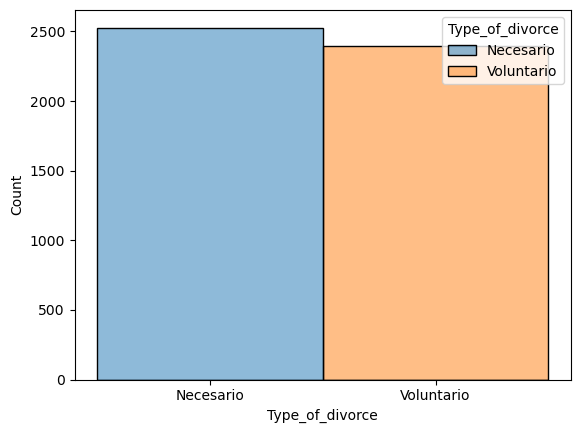

In [9]:
sns.histplot(data=divorce, x='Type_of_divorce', hue='Type_of_divorce')

<Axes: xlabel='Level_of_education_partner_man', ylabel='Count'>

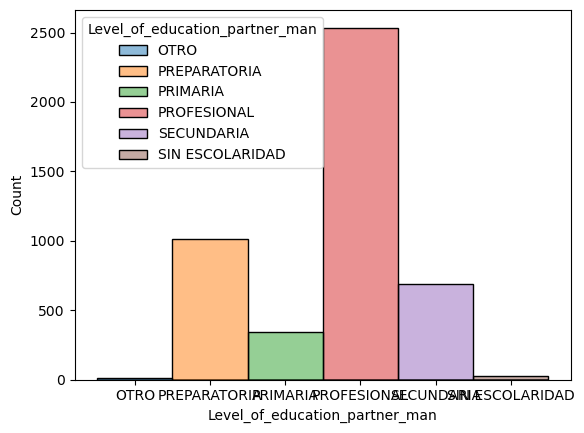

In [13]:
sns.histplot(data=divorce, x='Level_of_education_partner_man', hue='Level_of_education_partner_man')

In [14]:
divorce['Level_of_education_partner_man'].value_counts(normalize=True)

Level_of_education_partner_man
PROFESIONAL        0.549037
PREPARATORIA       0.218662
SECUNDARIA         0.149816
PRIMARIA           0.074042
SIN ESCOLARIDAD    0.005412
OTRO               0.003031
Name: proportion, dtype: float64

In [15]:
pd.crosstab(divorce['Level_of_education_partner_man'], divorce['Level_of_education_partner_woman'])

Level_of_education_partner_woman,OTRO,PREPARATORIA,PRIMARIA,PROFESIONAL,SECUNDARIA,SIN ESCOLARIDAD
Level_of_education_partner_man,,,,,,
OTRO,3,3,0,6,1,0
PREPARATORIA,3,402,38,376,152,1
PRIMARIA,0,52,142,27,87,9
PROFESIONAL,3,338,23,1960,131,1
SECUNDARIA,3,168,75,145,267,4
SIN ESCOLARIDAD,0,1,8,1,6,7


In [16]:
pd.crosstab(divorce['Level_of_education_partner_man'], divorce['Level_of_education_partner_woman'], 
            values=divorce['Num_Children'], aggfunc='median')

Level_of_education_partner_woman,OTRO,PREPARATORIA,PRIMARIA,PROFESIONAL,SECUNDARIA,SIN ESCOLARIDAD
Level_of_education_partner_man,,,,,,
OTRO,1.0,3.0,NaN,2.0,NaN,NaN
PREPARATORIA,1.0,2.0,2.0,1.0,2.0,2.0
PRIMARIA,NaN,2.0,3.0,2.0,2.0,4.0
PROFESIONAL,2.0,2.0,2.0,2.0,2.0,1.0
SECUNDARIA,1.0,2.0,2.0,2.0,2.0,1.5
SIN ESCOLARIDAD,NaN,NaN,3.0,NaN,3.0,3.0


# Generating new features 

Sometimes we have to do changes on the data as we received it, replacing chars, converting into numeric, extracting year, month or day, 



In [ ]:
str.replace
dt.month
dt.year
dt.day
dt.hour


We can group values into classes too:

In [18]:
twenty_fifth = divorce['Monthly_income_partner_man_peso'].quantile(0.25)
fifthy = divorce['Monthly_income_partner_man_peso'].quantile(0.5)
seventy_fifth = divorce['Monthly_income_partner_man_peso'].quantile(0.75)
max_ = divorce['Monthly_income_partner_man_peso'].max()

labels = ['low_inc', 'med_inc', 'med_high_inc', 'high_inc']
bins = [0, twenty_fifth, fifthy, seventy_fifth, max_]

In [19]:
divorce["inc_cat"]=pd.cut(divorce['Monthly_income_partner_man_peso'], 
                          labels=labels,
                         bins=bins)

In [20]:
divorce

,Divorce_date,Type_of_divorce,Nationality_partner_man,DOB_partner_man,Place_of_birth_partner_man,Birth_municipality_of_partner_man,Birth_federal_partner_man,Birth_country_partner_man,Age_partner_man,Residence_municipality_partner_man,...,Marriage_certificate_federal,Level_of_education_partner_man,Employment_status_partner_man,Level_of_education_partner_woman,Employment_status_partner_woman,Marriage_duration,Marriage_duration_months,Num_Children,Custody,inc_cat
0,9/6/06,Necesario,MEXICANA,18/12/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,XALAPA,...,VERACRUZ,SECUNDARIA,OBRERO,SECUNDARIA,EMPLEADO,5.0,NaN,1.0,NaN,low_inc
1,1/2/00,Voluntario,MEXICANA,NaN,NaN,NaN,NaN,NaN,47.0,NaN,...,VERACRUZ,PREPARATORIA,ESTABLECIMIENTO,PREPARATORIA,EMPLEADO,NaN,NaN,NaN,NaN,NaN
2,1/2/05,Necesario,MEXICANA,22/2/55,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,49.0,NaN,...,VERACRUZ,PREPARATORIA,OBRERO,NaN,TRABAJADOR POR CUENTA PROPIA EN VIA PUBLICA,NaN,NaN,NaN,NaN,NaN
3,1/2/06,Necesario,MEXICANA,20/1/64,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,42.0,XALAPA,...,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,EMPLEADO,18.0,NaN,2.0,MADRE,med_high_inc
4,1/2/06,Necesario,MEXICANA,30/10/75,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,30.0,COATEPEC,...,VERACRUZ,PROFESIONAL,EMPLEADO,PREPARATORIA,NO TRABAJA,7.0,NaN,2.0,MADRE,high_inc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4918,31/10/12,Voluntario,MEXICANA,29/10/77,MORELIA,MORELIA,MICHOACAN,MEXICO,35.0,MORELIA,...,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,3.0,11.0,NaN,NaN,high_inc
4919,31/10/13,Voluntario,MEXICANA,10/11/82,VERACRUZ,VERACRUZ,VERACRUZ,MEXICO,30.0,XALAPA,...,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,1.0,NaN,NaN,NaN,NaN
4920,31/10/13,Voluntario,MEXICANA,28/10/54,XALAPA - ENRIQUEZ,XALAPA,VERACRUZ,MEXICO,59.0,EMILIANO ZAPATA,...,VERACRUZ,PROFESIONAL,EMPLEADO,PROFESIONAL,EMPLEADO,35.0,NaN,2.0,NaN,high_inc
4921,31/12/12,Voluntario,MEXICANA,7/2/58,TLAPACOYAN,TLAPACOYAN,VERACRUZ,MEXICO,54.0,XALAPA,...,VERACRUZ,PREPARATORIA,NaN,PRIMARIA,NO TRABAJA,33.0,NaN,2.0,NaN,NaN
